Data Read

In [2]:
#install.packages("openxlsx")

package 'openxlsx' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	G:\Temp\Rtmpk3nySC\downloaded_packages


In [3]:
library(openxlsx)

In [4]:
data <- read.xlsx("data/kn1.xlsx",  sheet = 1)

In [5]:
head(data)

,N,Name,Group,Email
,<dbl>,<chr>,<dbl>,<chr>
1,1,Андрощук Роман Вікторович,1,roman.androshchuk@oa.edu.ua
2,2,Башмаков Богдан Олегович,1,bohdan.bashmakov@oa.edu.ua
3,3,Боженко Анастасія Ігорівна,1,anastasiia.bozhenko@oa.edu.ua
4,4,Власенко Андрій Максимович,1,andrii.vlasenko@oa.edu.ua
5,5,Войтюк Назарій Васильович,1,nazarii.voitiuk@oa.edu.ua
6,6,Воробей Юрій Вікторович,1,yurii.vorobei@oa.edu.ua


[1] "КН11" "КН11" "КН11" "КН11" "КН11" "КН11" "КН11" "КН11" "КН11" "КН11"
[11] "КН11" "КН12" "КН12" "КН12" "КН12" "КН12" "КН12" "КН12" "КН12" "КН12"
[21] "КН12" "КН12"

In [21]:
data$Group <- paste("КН1", data$Group, sep = "")

In [26]:
head(data)

,N,Name,Group,Email
,<dbl>,<chr>,<chr>,<chr>
1,1,Андрощук Роман Вікторович,КН11,roman.androshchuk@oa.edu.ua
2,2,Башмаков Богдан Олегович,КН11,bohdan.bashmakov@oa.edu.ua
3,3,Боженко Анастасія Ігорівна,КН11,anastasiia.bozhenko@oa.edu.ua
4,4,Власенко Андрій Максимович,КН11,andrii.vlasenko@oa.edu.ua
5,5,Войтюк Назарій Васильович,КН11,nazarii.voitiuk@oa.edu.ua
6,6,Воробей Юрій Вікторович,КН11,yurii.vorobei@oa.edu.ua


In [27]:
write.xlsx(data, "data/kn1_new.xlsx", colNames = TRUE)

## XML

In [28]:
xml_path <- "data/workers.xml"

In [31]:
#install.packages("XML")
#install.packages("methods")

In [32]:
library("XML")
library("methods")

In [35]:
result <- xmlParse(file = xml_path)
print(result)

<?xml version="1.0"?>
<RECORDS>
  <EMPLOYEE>
    <ID>1</ID>
    <NAME>Rick</NAME>
    <SALARY>623.3</SALARY>
    <STARTDATE>1/1/2012</STARTDATE>
    <DEPT>IT</DEPT>
  </EMPLOYEE>
  <EMPLOYEE>
    <ID>2</ID>
    <NAME>Dan</NAME>
    <SALARY>515.2</SALARY>
    <STARTDATE>9/23/2013</STARTDATE>
    <DEPT>Operations</DEPT>
  </EMPLOYEE>
  <EMPLOYEE>
    <ID>3</ID>
    <NAME>Michelle</NAME>
    <SALARY>611</SALARY>
    <STARTDATE>11/15/2014</STARTDATE>
    <DEPT>IT</DEPT>
  </EMPLOYEE>
  <EMPLOYEE>
    <ID>4</ID>
    <NAME>Ryan</NAME>
    <SALARY>729</SALARY>
    <STARTDATE>5/11/2014</STARTDATE>
    <DEPT>HR</DEPT>
  </EMPLOYEE>
  <EMPLOYEE>
    <ID>5</ID>
    <NAME>Gary</NAME>
    <SALARY>843.25</SALARY>
    <STARTDATE>3/27/2015</STARTDATE>
    <DEPT>Finance</DEPT>
  </EMPLOYEE>
  <EMPLOYEE>
    <ID>6</ID>
    <NAME>Nina</NAME>
    <SALARY>578</SALARY>
    <STARTDATE>5/21/2013</STARTDATE>
    <DEPT>IT</DEPT>
  </EMPLOYEE>
  <EMPLOYEE>
    <ID>7</ID>
    <NAME>Simon</NAME>
    <SALARY>632.8<

In [38]:
rootnode <- xmlRoot(result) # reading rootnode of xml document
rootnode[[2]]

<EMPLOYEE>
  <ID>2</ID>
  <NAME>Dan</NAME>
  <SALARY>515.2</SALARY>
  <STARTDATE>9/23/2013</STARTDATE>
  <DEPT>Operations</DEPT>
</EMPLOYEE> 

In [42]:
data <- xmlToDataFrame(xml_path)
data

ID,NAME,SALARY,STARTDATE,DEPT
<chr>,<chr>,<chr>,<chr>,<chr>
1,Rick,623.3,1/1/2012,IT
2,Dan,515.2,9/23/2013,Operations
3,Michelle,611,11/15/2014,IT
4,Ryan,729,5/11/2014,HR
5,Gary,843.25,3/27/2015,Finance
6,Nina,578,5/21/2013,IT
7,Simon,632.8,7/30/2013,Operations
8,Guru,722.5,6/17/2014,Finance


In [44]:
data$SALARY <- as.numeric(data$SALARY)

In [45]:
head(data)

,ID,NAME,SALARY,STARTDATE,DEPT
,<chr>,<chr>,<dbl>,<chr>,<chr>
1,1,Rick,623.30,1/1/2012,IT
2,2,Dan,515.20,9/23/2013,Operations
3,3,Michelle,611.00,11/15/2014,IT
4,4,Ryan,729.00,5/11/2014,HR
5,5,Gary,843.25,3/27/2015,Finance
6,6,Nina,578.00,5/21/2013,IT


## API demo

In [48]:
# install.packages("jsonlite")

In [12]:
library(jsonlite)

In [13]:
# https://api.binance.com/api/v3/klines?symbol=

In [28]:
market = 'BTCUSDT'
interval = '1d'
limit = 1000

url <- paste0(url = "https://api.binance.com/api/v3/klines?symbol=", market ,"&interval=", interval,"&limit=", limit)
print(url) 

[1] "https://api.binance.com/api/v3/klines?symbol=BTCUSDT&interval=1d&limit=1000"


In [29]:
data <- fromJSON(url)

In [30]:
head(data)

1631318400000,44842.20000000,45987.93000000,44722.22000000,45173.69000000,30440.40810000,1631404799999,1380370764.01271670,1060890,14804.34260000,671123069.56236850,0
1631404800000,45173.68000000,46460.00000000,44742.06000000,46025.24000000,32094.28052000,1631491199999,1464780920.21998130,1179808,15735.45104000,718436012.75886560,0
1631491200000,46025.23000000,46880.00000000,43370.00000000,44940.73000000,65429.15056000,1631577599999,2930668118.26163420,1703512,32041.05972000,1435586958.77986810,0
1631577600000,44940.72000000,47250.00000000,44594.44000000,47111.52000000,44855.85099000,1631663999999,2072259519.06191970,1210258,22182.46649000,1025156547.71891840,0
1.631664e+12,47103.28000000,48500.00000000,46682.32000000,48121.41000000,43204.71174000,1631750399999,2056996398.84396170,1176050,20903.53535000,995198313.74741110,0
1631750400000,48121.40000000,48557.00000000,47021.10000000,47737.82000000,40725.08895000,1631836799999,1948447232.91071780,1176129,19907.79151000,952502982.81190170,0


In [31]:
data <- data[, 1:7]
head(data)

1631318400000,44842.20000000,45987.93000000,44722.22000000,45173.69000000,30440.40810000,1631404799999
1631404800000,45173.68000000,46460.00000000,44742.06000000,46025.24000000,32094.28052000,1631491199999
1631491200000,46025.23000000,46880.00000000,43370.00000000,44940.73000000,65429.15056000,1631577599999
1631577600000,44940.72000000,47250.00000000,44594.44000000,47111.52000000,44855.85099000,1631663999999
1.631664e+12,47103.28000000,48500.00000000,46682.32000000,48121.41000000,43204.71174000,1631750399999
1631750400000,48121.40000000,48557.00000000,47021.10000000,47737.82000000,40725.08895000,1631836799999


In [32]:
data <- as.data.frame(data) 
head(data)

,V1,V2,V3,V4,V5,V6,V7
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,1631318400000,44842.20000000,45987.93000000,44722.22000000,45173.69000000,30440.40810000,1631404799999
2,1631404800000,45173.68000000,46460.00000000,44742.06000000,46025.24000000,32094.28052000,1631491199999
3,1631491200000,46025.23000000,46880.00000000,43370.00000000,44940.73000000,65429.15056000,1631577599999
4,1631577600000,44940.72000000,47250.00000000,44594.44000000,47111.52000000,44855.85099000,1631663999999
5,1.631664e+12,47103.28000000,48500.00000000,46682.32000000,48121.41000000,43204.71174000,1631750399999
6,1631750400000,48121.40000000,48557.00000000,47021.10000000,47737.82000000,40725.08895000,1631836799999


In [33]:
colnames(data) <- c("Open_time", "Open", "High", "Low", "Close", "Volume", "Close_time")
head(data)

,Open_time,Open,High,Low,Close,Volume,Close_time
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,1631318400000,44842.20000000,45987.93000000,44722.22000000,45173.69000000,30440.40810000,1631404799999
2,1631404800000,45173.68000000,46460.00000000,44742.06000000,46025.24000000,32094.28052000,1631491199999
3,1631491200000,46025.23000000,46880.00000000,43370.00000000,44940.73000000,65429.15056000,1631577599999
4,1631577600000,44940.72000000,47250.00000000,44594.44000000,47111.52000000,44855.85099000,1631663999999
5,1.631664e+12,47103.28000000,48500.00000000,46682.32000000,48121.41000000,43204.71174000,1631750399999
6,1631750400000,48121.40000000,48557.00000000,47021.10000000,47737.82000000,40725.08895000,1631836799999


In [34]:
data <-  data.frame(sapply(data, as.numeric))

In [35]:
head(data)

,Open_time,Open,High,Low,Close,Volume,Close_time
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1.631318e+12,44842.20,45987.93,44722.22,45173.69,30440.41,1.631405e+12
2,1.631405e+12,45173.68,46460.00,44742.06,46025.24,32094.28,1.631491e+12
3,1.631491e+12,46025.23,46880.00,43370.00,44940.73,65429.15,1.631578e+12
4,1.631578e+12,44940.72,47250.00,44594.44,47111.52,44855.85,1.631664e+12
5,1.631664e+12,47103.28,48500.00,46682.32,48121.41,43204.71,1.631750e+12
6,1.631750e+12,48121.40,48557.00,47021.10,47737.82,40725.09,1.631837e+12


In [36]:
data$Open_time <- as.POSIXct(data$Open_time/1e3, origin = '1970-01-01')
data$Close_time <- as.POSIXct(data$Close_time/1e3, origin = '1970-01-01')

In [37]:

tail(data)


,Open_time,Open,High,Low,Close,Volume,Close_time
,<dttm>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dttm>
995,2024-06-01 03:00:00,67540.01,67900.00,67428.44,67766.85,8837.661,2024-06-02 02:59:59
996,2024-06-02 03:00:00,67766.84,68460.00,67257.47,67765.63,15426.325,2024-06-03 02:59:59
997,2024-06-03 03:00:00,67765.62,70288.00,67612.48,68809.90,29633.374,2024-06-04 02:59:59
998,2024-06-04 03:00:00,68809.89,71063.45,68567.32,70537.84,29619.785,2024-06-05 02:59:59
999,2024-06-05 03:00:00,70537.83,71758.00,70383.66,71108.00,28703.181,2024-06-06 02:59:59
1000,2024-06-06 03:00:00,71108.00,71237.02,70800.00,71104.00,6150.610,2024-06-07 02:59:59


In [38]:
length((data$Open + data$Close)/2)

[1] 1000

In [39]:
length(data$Open_Time)

[1] 0

In [40]:
data_final <- data.frame(Date = data$Open_time,
                        MeanPrice = (data$Open + data$Close) / 2)

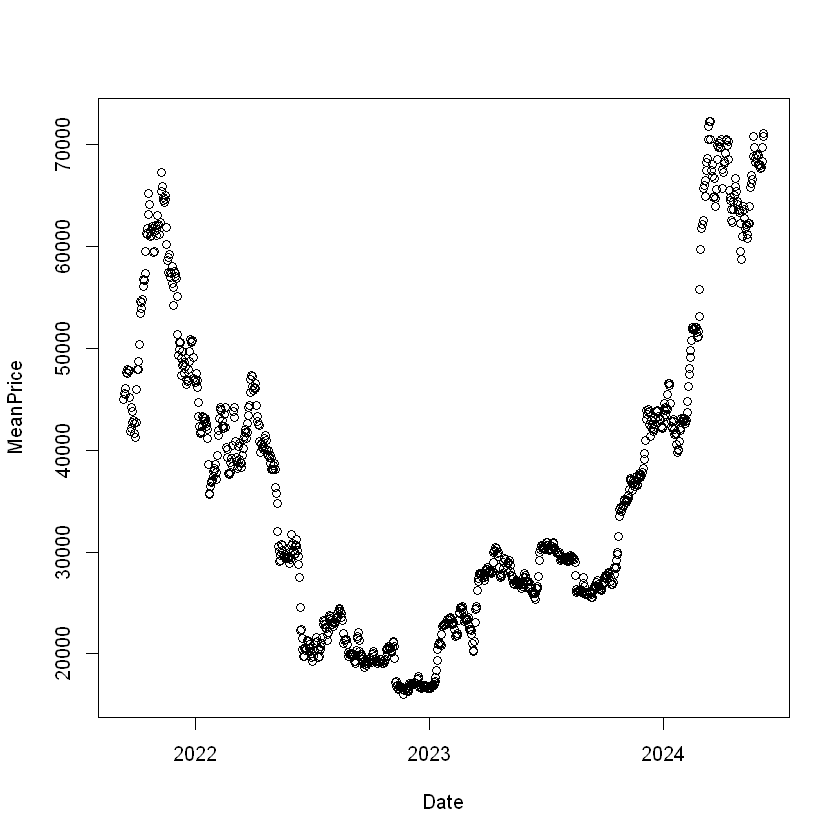

In [41]:
plot(data_final)

## Data from web

In [84]:
# install.packages("rvest")

In [86]:
library(rvest)

In [88]:
url <- "https://en.wikipedia.org/wiki/List_of_largest_banks"

In [90]:
page <- read_html(url)
page

{html_document}
<html class="client-nojs vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-sticky-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-clientpref-1 vector-feature-main-menu-pinned-disabled vector-feature-limited-width-clientpref-1 vector-feature-limited-width-content-enabled vector-feature-custom-font-size-clientpref-0 vector-feature-client-preferences-disabled vector-feature-client-prefs-pinned-disabled vector-feature-night-mode-disabled skin-night-mode-clientpref-0 vector-toc-available" lang="en" dir="ltr">
[1] <head>\n<meta http-equiv="Content-Type" content="text/html; charset=UTF-8 ...
[2] <body class="skin-vector skin-vector-search-vue mediawiki ltr sitedir-ltr ...

In [92]:
tables <- html_nodes(page, "table")
tables

{xml_nodeset (3)}
[1] <table class="wikitable sortable mw-collapsible"><tbody>\n<tr>\n<th data- ...
[2] <table class="wikitable sortable mw-collapsible"><tbody>\n<tr>\n<th data- ...
[3] <table class="wikitable sortable mw-collapsible">\n<caption>Number of ban ...

In [98]:
data <- data.frame(html_table(tables[1]))

In [99]:
head(data)

,Rank,Bank.name,Market.cap.US..billion.
,<int>,<chr>,<dbl>
1,1,JPMorgan Chase,491.76
2,2,Bank of America,266.45
3,3,Industrial and Commercial Bank of China,219.45
4,4,Wells Fargo,178.74
5,5,Agricultural Bank of China,175.69
6,6,HDFC Bank,169.84


In [101]:
colnames(data) <- c("Rank", "Name", "MarketCap")

In [103]:
head(data)

,Rank,Name,MarketCap
,<int>,<chr>,<dbl>
1,1,JPMorgan Chase,491.76
2,2,Bank of America,266.45
3,3,Industrial and Commercial Bank of China,219.45
4,4,Wells Fargo,178.74
5,5,Agricultural Bank of China,175.69
6,6,HDFC Bank,169.84


In [104]:
range(data$MarketCap)

[1] 150.39 491.76